In [1]:
import pandas as pd                                                                 #importa biblioteca pandas
import matplotlib.pyplot as plt                                                     #importa biblioteca de plotagem de gráficos
from sklearn.linear_model import LinearRegression                                   #funções de regressão linear
from sklearn.metrics import mean_squared_error                                      #função que calcula média de erro quadrático
from sklearn.metrics import mean_absolute_error                                     #função que calcula média de erro absoluto
from sklearn.model_selection import train_test_split                                #função que divide os dados entre teste e treino

df = pd.read_csv('usa_mercedes_benz_prices.csv')                                    #lê e puxa a tabela do excel

def clean(x):                                                                       #função que transforma o texto da coluna Mileage em número inteiro
    x = x.replace(" mi.", "").replace(",", "")                                      #substitui strings por espaços vazios e vírgula por ponto
    return int(x)                                                                   #retorna um inteiro
    
df['Mileage'] = df['Mileage'].apply(clean)                                          #aplica a função à coluna Mileage do dataframe
df                                                                                  #exibe o dataframe

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,29636,3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,5540,4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,4890,4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,29746,4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,32631,5.0,"1,502","$95,990"
...,...,...,...,...,...
2424,2021 Mercedes-Benz E-Class E 450 4MATIC,54422,NaN,236,"$53,490"
2425,2022 Mercedes-Benz S-Class 4MATIC,11395,4.5,"1,334","$89,599"
2426,2021 Mercedes-Benz GLB 250 Base 4MATIC,30392,4.9,"2,375","$32,890"
2427,2023 Mercedes-Benz E-Class E 450 4MATIC,3413,4.8,"1,758","$53,983"


In [2]:
df_util = df[df['Price'] != 'Not Priced']                                           #remove uma linha errada que continha o valor 'not priced'
df_util = df_util[df_util['Mileage'] < 125000]                                      #remove valores de quilometragem maiores que 125.000
df_util = df_util[['Mileage', 'Price']]                                             #filtra o dataframe pra conter apenas quilometragem e preço
df_util                                                                             #exibe o dataframe a ser usado

,Mileage,Price
0,29636,"$30,900"
1,5540,"$139,999"
2,4890,"$132,999"
3,29746,"$58,587"
4,32631,"$95,990"
...,...,...
2424,54422,"$53,490"
2425,11395,"$89,599"
2426,30392,"$32,890"
2427,3413,"$53,983"


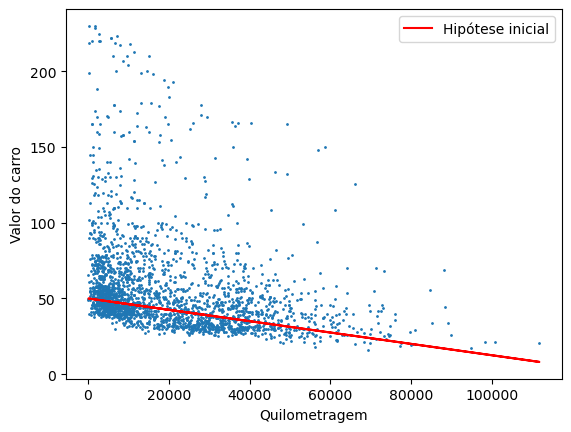

Erros da reta 1: quadrado = 1096.958596567496, absoluto = 18.165133395138028


In [3]:
quilometragens = df_util.Mileage.values                                             #salva os valores de quilometragem em uma lista
precos = df_util.Price.values                                                       #salva os valores de preços em uma lista

precos = [x[1:] for x in precos]                                                    #remove o $ dos preços da lista
precos = [x.replace(',', '.') for x in precos]                                      #substitui vírgula por ponto
precos = [float(x) for x in precos]                                                 #transforma os valores da lista em floats

fig, ax = plt.subplots()                                                            #inicializa um gráfico
ax.scatter(quilometragens, precos, s=1)                                             #espalha os valores (x,y) de cada carro no gráfico

X_reta1 = quilometragens                                                            #valor x da reta é quilometragem
y_reta1 = (-3/8000)*X_reta1+50                                                      #valor y é uma hipótese com valores angular e linear hipotéticos
ax.plot(X_reta1, y_reta1, 'r', label='Hipótese inicial')                            #plota uma reta de hipótese para uma previsão aproximada
plt.legend()                                                                        #exibe legenda do gráfico

plt.xlabel("Quilometragem")                                                         #eixo x é quilometragem
plt.ylabel("Valor do carro")                                                        #eixo y são os preços dos carros
plt.show()                                                                          #mostra a tabela

err_abs_reta1 = mean_absolute_error(precos, y_reta1)                                 #calcula média de erro absoluto da reta
err_qdr_reta1 = mean_squared_error(precos, y_reta1)                                  #calcula média de erro quadrático da reta
print(f'Erros da reta 1: quadrado = {err_qdr_reta1}, absoluto = {err_abs_reta1}')   #printa os erros da reta criada

In [4]:
X = quilometragens                                                                 #salva as quilometragens numa variavel X
y = precos                                                                         #salva os preços numa variável y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)          #separa os valores X e y entre treino e teste. proporção 80/20
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)                      #cria e treina um modelo de Regressão Linear com os dados disponíveis
y_pred = reg.predict(X_test.reshape(-1, 1))                                        #faz previsões com os valores X de teste

err_abs_reta2 = mean_absolute_error(y_test, y_pred)                                #calcula média de erro absoluto da previsão
err_qdr_reta2 = mean_squared_error(y_test, y_pred)                                 #calcula média de erro quadrático da da previsão
print(f'Erros da previsão: quadrado = {err_qdr_reta2}, absoluto = {err_abs_reta2}')#printa erros da previsão

Erros da previsão: quadrado = 943.7070224699066, absoluto = 19.67063746994973


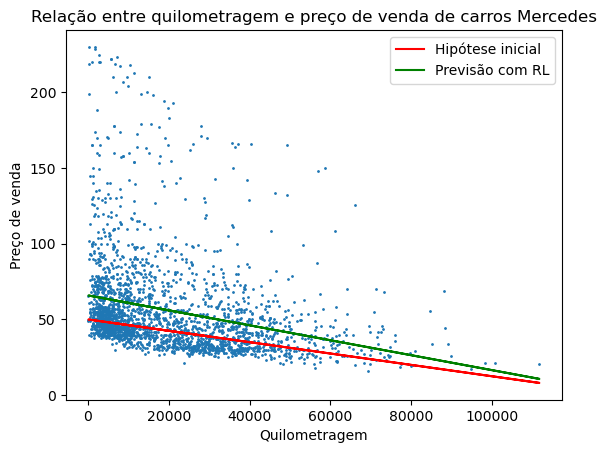

In [5]:
fig2, ax2 = plt.subplots()                                                         #cria um segundo gráfico
ax2.scatter(quilometragens, precos, s=1)                                           #espalha os valores de quilometragem e preço de cada carro
ax2.plot(X_reta1, y_reta1, 'r', label='Hipótese inicial')                          #plota a reta de hipótese inicial

a = reg.coef_[0]                                                                   #coeficiente angular - função generica do scikit
b = reg.intercept_                                                                 #coeficiente linear - função genérica do scikit
X_reta2 = quilometragens                                                           #valor x da reta é quilometragem
y_reta2 = a*X_reta2+b                                                              #valor y da reta usa coeficientes angular e linear
ax2.plot(X_reta2, y_reta2, 'g', label='Previsão com RL')                           #plota reta criada pelo modelo de Regressão Linear

plt.legend()                                                                       #exibe legenda do gráfico
plt.title('Relação entre quilometragem e preço de venda de carros Mercedes')       #dá um título ao gráfico
plt.xlabel("Quilometragem")                                                        #eixo x é quilometragem
plt.ylabel("Preço de venda")                                                       #eixo y são os preços dos carros
plt.show()                                                                         #mostra a tabela